In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline


# Loading the dataset

In [2]:

df = pd.read_csv('final.csv')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(121, 12)


,Country,Corona,Corona virus,Covid cases,Face mask,Hand sanitizer,Hand wash,Lockdown,N95,PPE,Social distancing,Vaccine
0,afghanistan,4235,1882,1782,980,1025,383,1387,687,495,269,3172
1,albania,4168,1276,1103,1603,364,279,1968,511,690,695,3191
2,algeria,5599,3876,2716,1379,541,199,1731,1423,1232,745,2561
3,argentina,6185,3985,3836,3251,1205,655,5214,2286,1948,1471,4780
4,australia,4598,3469,9219,1490,2260,7893,1713,1969,6664,3510,8623


# Data Preprocessing


In [4]:
# Check for null entries
df.isnull().sum()

Country              0
Corona               0
Corona virus         0
Covid cases          0
Face mask            0
Hand sanitizer       0
Hand wash            0
Lockdown             0
N95                  0
PPE                  0
Social distancing    0
Vaccine              0
dtype: int64

In [5]:
# Remove any duplicate entries
df.drop_duplicates(inplace = True)
print(df.shape)

(121, 12)


In [7]:
# investigate elements per feature

for cols in df.columns:
    unique_vals = df[cols].unique()
    nr_unique_vals = len(unique_vals)
    if nr_unique_vals < 12:
        print(cols,"has ", nr_unique_vals, "and the list includes ", unique_vals)
    else:
        print(cols,"has ", nr_unique_vals)


Country has  121
Corona has  119
Corona virus has  116
Covid cases has  120
Face mask has  120
Hand sanitizer has  120
Hand wash has  106
Lockdown has  120
N95 has  120
PPE has  121
Social distancing has  114
Vaccine has  119


# Feature Scaling 

In [12]:
#check dataset summary
df.describe()

,Corona,Corona virus,Covid cases,Face mask,Hand sanitizer,Hand wash,Lockdown,N95,PPE,Social distancing,Vaccine
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,5022.000000,3012.123967,3949.834711,3597.099174,1774.842975,1464.694215,2602.578512,1986.586777,2172.206612,1688.685950,3810.371901
std,1969.880935,957.555286,2391.102648,2386.453273,1594.943500,2132.893750,1330.191513,1309.216284,1858.443152,1669.551422,1580.802049
min,1250.000000,1081.000000,519.000000,640.000000,100.000000,100.000000,374.000000,100.000000,198.000000,100.000000,1004.000000
25%,3794.000000,2185.000000,2247.000000,1733.000000,727.000000,291.000000,1586.000000,973.000000,803.000000,604.000000,2574.000000
50%,4651.000000,3093.000000,3478.000000,3237.000000,1261.000000,755.000000,2343.000000,1752.000000,1522.000000,1133.000000,3650.000000
75%,6160.000000,3725.000000,5342.000000,4562.000000,2334.000000,1710.000000,3584.000000,2752.000000,3231.000000,2211.000000,4780.000000
max,11928.000000,5657.000000,12456.000000,13408.000000,9470.000000,12781.000000,6208.000000,6736.000000,11045.000000,8465.000000,8841.000000


In [16]:
X = df.drop(columns = 'Country') 
X.head()

,Corona,Corona virus,Covid cases,Face mask,Hand sanitizer,Hand wash,Lockdown,N95,PPE,Social distancing,Vaccine
0,4235,1882,1782,980,1025,383,1387,687,495,269,3172
1,4168,1276,1103,1603,364,279,1968,511,690,695,3191
2,5599,3876,2716,1379,541,199,1731,1423,1232,745,2561
3,6185,3985,3836,3251,1205,655,5214,2286,1948,1471,4780
4,4598,3469,9219,1490,2260,7893,1713,1969,6664,3510,8623


In [38]:
#find features that need to be scaled
scale_vars = []

for cols in X.columns:
    if X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['Corona',
 'Corona virus',
 'Covid cases',
 'Face mask',
 'Hand sanitizer',
 'Hand wash',
 'Lockdown',
 'N95',
 'PPE',
 'Social distancing',
 'Vaccine']

In [47]:
# Using MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X[scale_vars])
temp = scaler.transform(X[scale_vars])
df_minmax = pd.DataFrame(data=temp, columns = scale_vars)
df_minmax.head()

,Corona,Corona virus,Covid cases,Face mask,Hand sanitizer,Hand wash,Lockdown,N95,PPE,Social distancing,Vaccine
0,0.279547,0.175044,0.105805,0.026629,0.098719,0.022317,0.173637,0.088457,0.027381,0.020203,0.276636
1,0.273272,0.042614,0.048924,0.075423,0.028175,0.014116,0.273226,0.061935,0.045358,0.071130,0.279061
2,0.407286,0.610795,0.184050,0.057879,0.047065,0.007807,0.232602,0.199367,0.095326,0.077107,0.198673
3,0.462165,0.634615,0.277876,0.204496,0.117930,0.043766,0.829619,0.329415,0.161335,0.163897,0.481817
4,0.313542,0.521853,0.728826,0.066573,0.230523,0.614541,0.229517,0.281646,0.596110,0.407651,0.972183


In [51]:
# Using StandardScaler
from sklearn.preprocessing import StandardScaler

temp = StandardScaler().fit_transform(X[scale_vars])
df_standard = pd.DataFrame(data=temp, columns = scale_vars)
df_standard.head()

,Corona,Corona virus,Covid cases,Face mask,Hand sanitizer,Hand wash,Lockdown,N95,PPE,Social distancing,Vaccine
0,-0.401178,-1.185125,-0.910395,-1.101208,-0.472092,-0.509257,-0.917637,-0.996772,-0.906232,-0.853875,-0.405507
1,-0.435331,-1.820618,-1.195545,-0.839066,-0.888250,-0.558220,-0.479042,-1.131763,-0.800869,-0.597656,-0.393438
2,0.294129,0.905920,-0.518156,-0.933319,-0.776813,-0.595884,-0.657952,-0.432266,-0.508014,-0.567583,-0.793627
3,0.592846,1.020224,-0.047806,-0.145630,-0.358767,-0.381201,1.971355,0.229647,-0.121144,-0.130928,0.615928
4,-0.216136,0.479111,2.212818,-0.886613,0.305449,3.026421,-0.671540,-0.013489,2.427016,1.095436,3.057080


# K means clustering (Using mixmax)


In [52]:
new_raw_data = df_minmax

In [55]:
# Running K means with multiple Ks value
no_of_clusters = range(2,15) 
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(new_raw_data)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 29.689710952762166
The inertia for : 3 Clusters is: 23.7036772989323
The inertia for : 4 Clusters is: 20.4376398018931
The inertia for : 5 Clusters is: 18.769596965629077
The inertia for : 6 Clusters is: 17.104947597199956
The inertia for : 7 Clusters is: 15.920016576456161
The inertia for : 8 Clusters is: 14.83812034079137
The inertia for : 9 Clusters is: 14.013549066358777
The inertia for : 10 Clusters is: 13.204456524864613
The inertia for : 11 Clusters is: 12.746274954653737
The inertia for : 12 Clusters is: 11.870908705660385
The inertia for : 13 Clusters is: 11.548515275932054
The inertia for : 14 Clusters is: 10.994860932168995
The inertia for : 15 Clusters is: 10.809058247969116
The inertia for : 16 Clusters is: 10.586863586752589
The inertia for : 17 Clusters is: 9.72504259902558
The inertia for : 18 Clusters is: 9.531023916636542
The inertia for : 19 Clusters is: 9.030248277512365


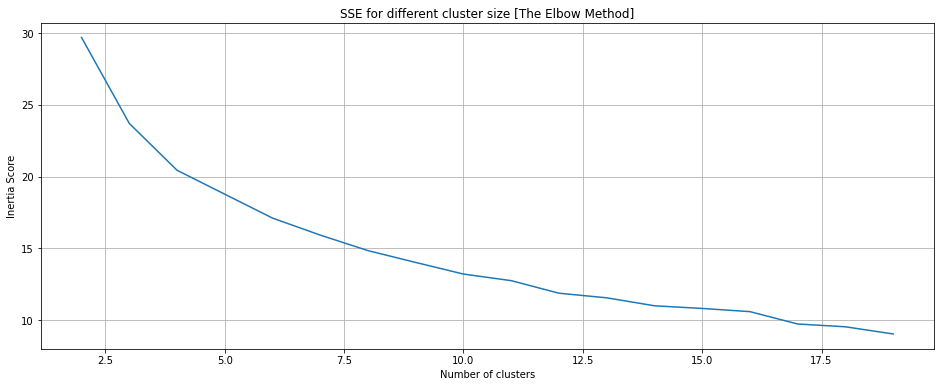

In [56]:
plt.figure(figsize = (16, 6))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('SSE for different cluster size [The Elbow Method]')
plt.plot(no_of_clusters, inertia)
plt.grid(True)
plt.show()

# K means using StandardScaler

In [62]:
new_raw_data = df_standard

In [63]:
# Running K means with multiple Ks value
no_of_clusters = range(2,15) 
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(new_raw_data)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 793.9633158702272
The inertia for : 3 Clusters is: 624.8128339082807
The inertia for : 4 Clusters is: 534.0156310657161
The inertia for : 5 Clusters is: 495.4047462273131
The inertia for : 6 Clusters is: 459.7328043216425
The inertia for : 7 Clusters is: 423.005166112835
The inertia for : 8 Clusters is: 393.5375206802854
The inertia for : 9 Clusters is: 375.9620678373034
The inertia for : 10 Clusters is: 356.85050794533123
The inertia for : 11 Clusters is: 324.9764500013287
The inertia for : 12 Clusters is: 310.8383739834972
The inertia for : 13 Clusters is: 306.60126594219696
The inertia for : 14 Clusters is: 289.2925104018509


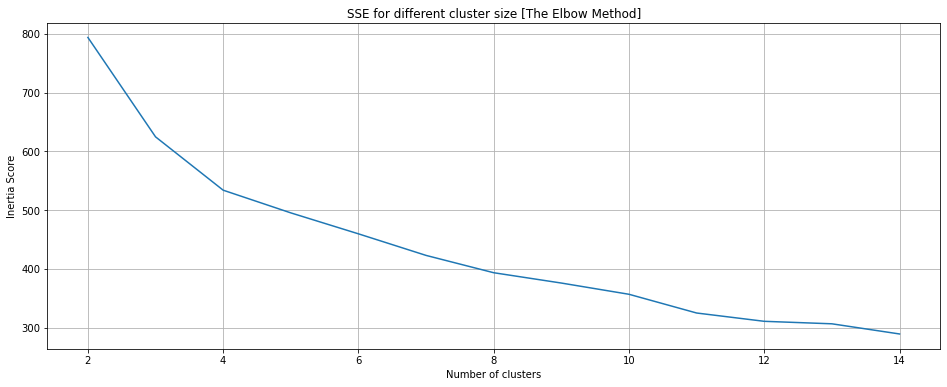

In [64]:
plt.figure(figsize = (16, 6))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('SSE for different cluster size [The Elbow Method]')
plt.plot(no_of_clusters, inertia)
plt.grid(True)
plt.show()

# Clustering Validation Technique (Silhouette)

For n_clusters = 2 The average silhouette_score is : 0.38749638687449556
For n_clusters = 3 The average silhouette_score is : 0.3244436872382947
For n_clusters = 4 The average silhouette_score is : 0.25309609524828214
For n_clusters = 5 The average silhouette_score is : 0.24782358250610875
For n_clusters = 6 The average silhouette_score is : 0.22015063801937534
For n_clusters = 7 The average silhouette_score is : 0.20697195798418974
For n_clusters = 8 The average silhouette_score is : 0.2190418482490028
For n_clusters = 9 The average silhouette_score is : 0.20294366274405232
For n_clusters = 10 The average silhouette_score is : 0.20242726669351455
For n_clusters = 11 The average silhouette_score is : 0.21716612924847345
For n_clusters = 12 The average silhouette_score is : 0.2108433560162805
For n_clusters = 13 The average silhouette_score is : 0.2011560813777943
For n_clusters = 14 The average silhouette_score is : 0.1465917170927699


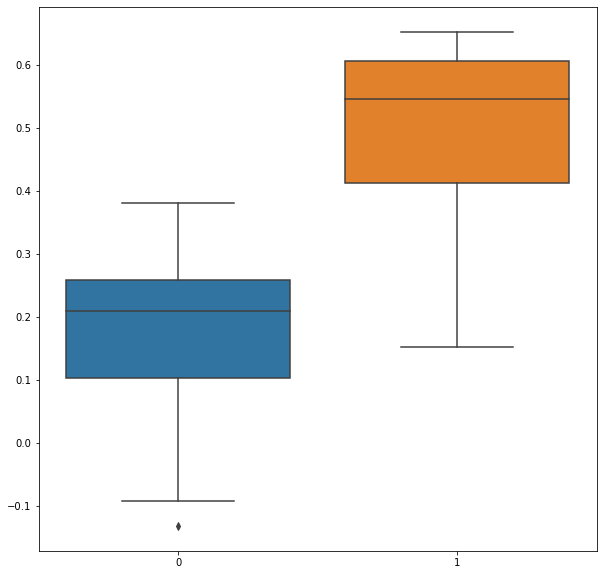

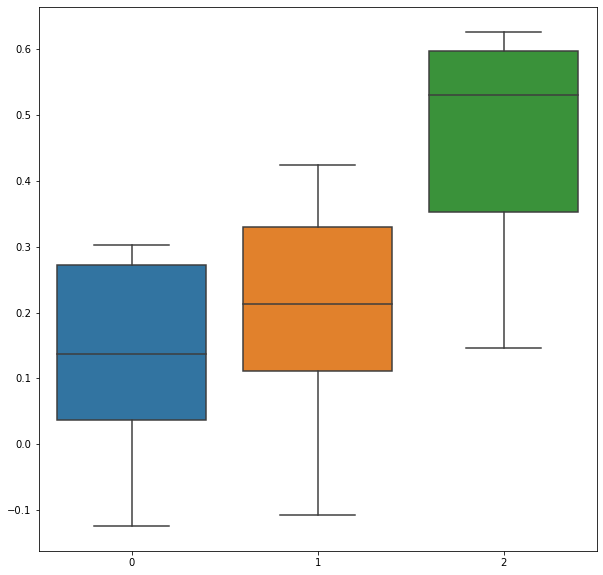

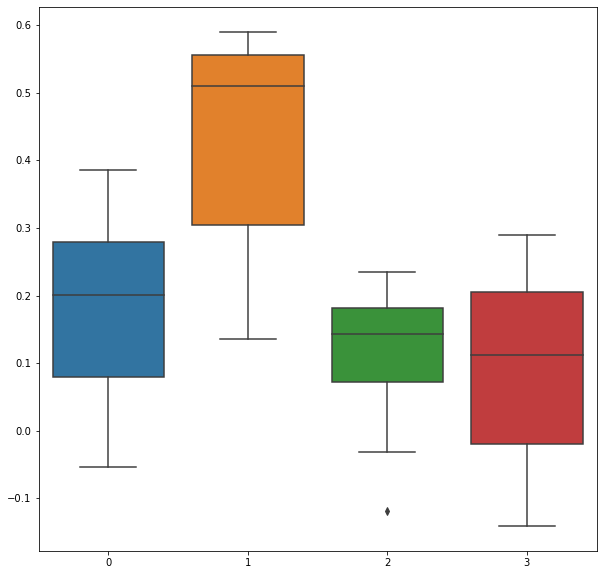

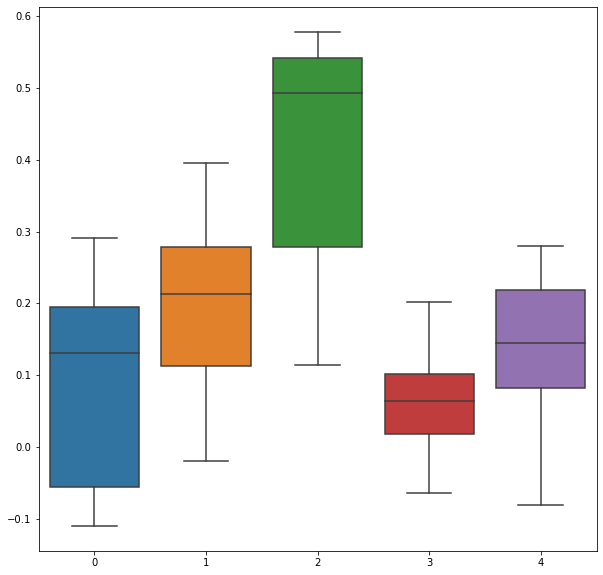

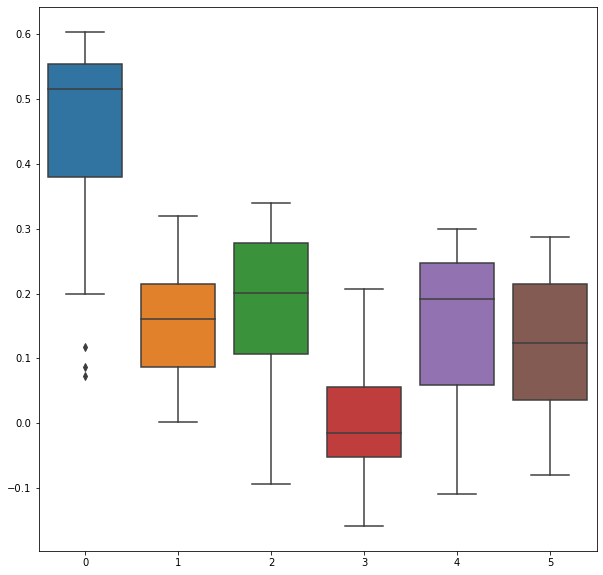

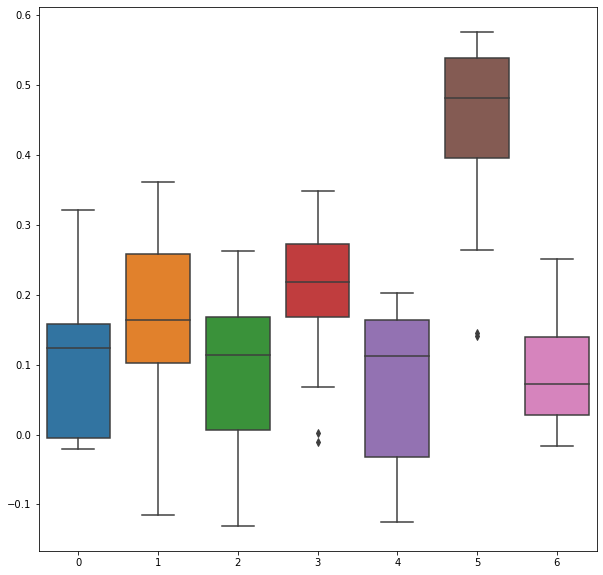

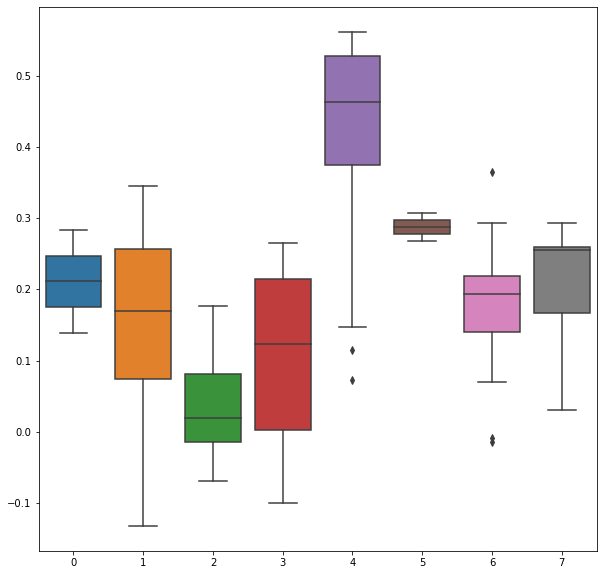

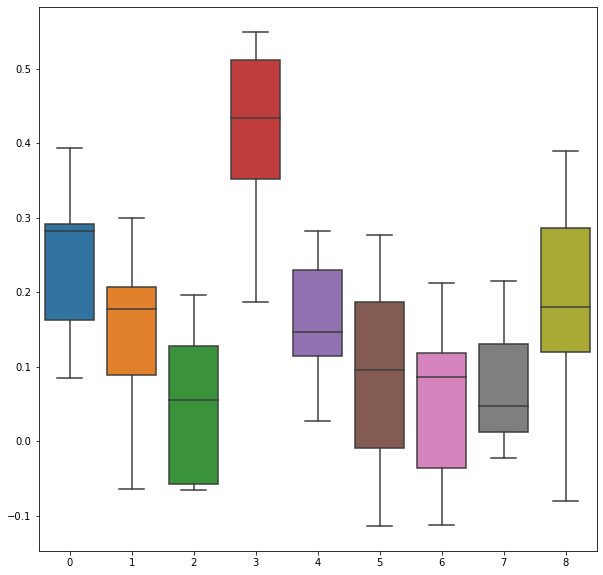

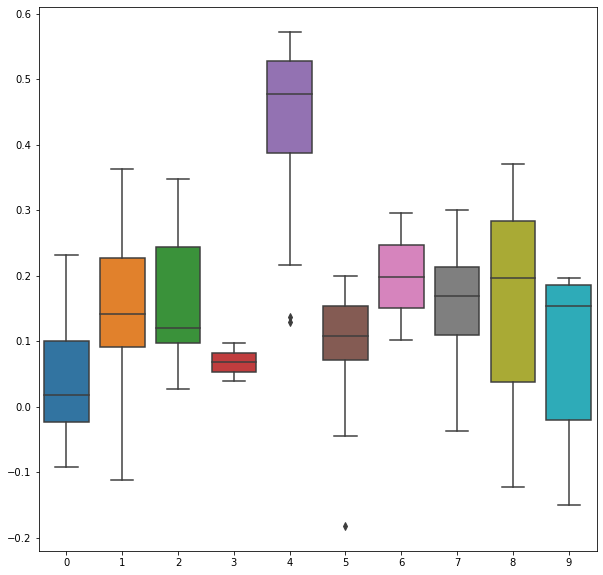

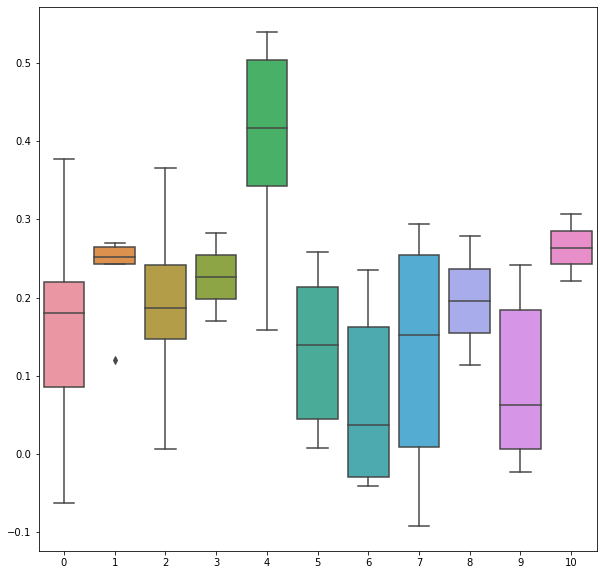

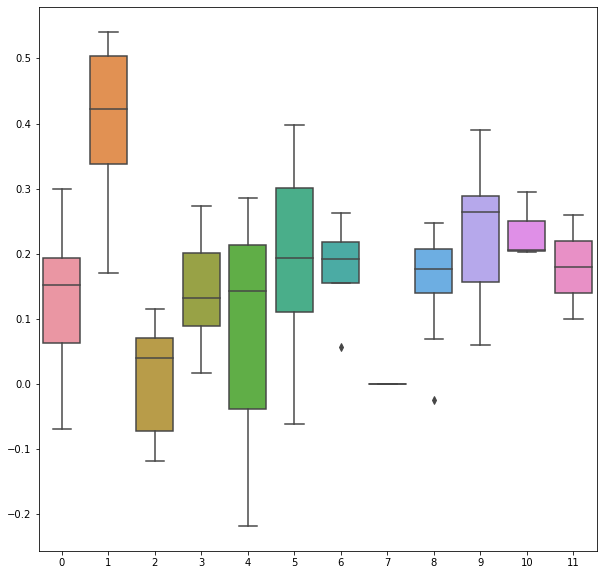

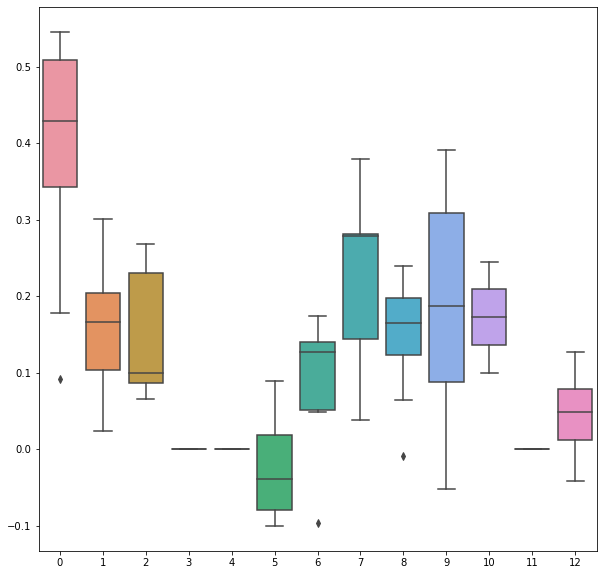

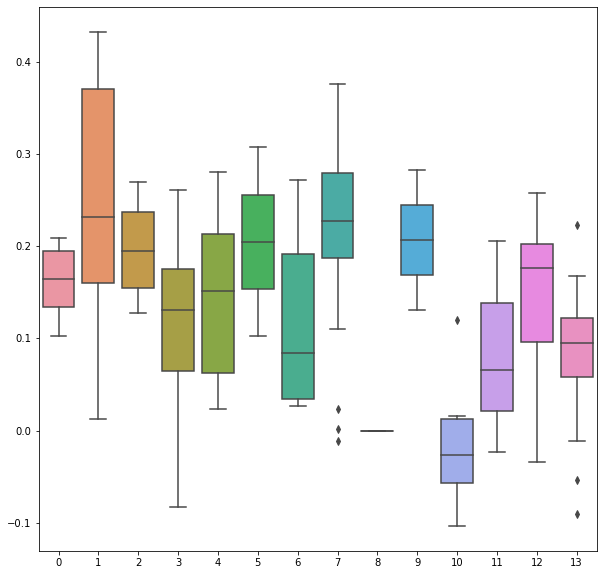

In [65]:
from sklearn.metrics import silhouette_samples, silhouette_score
avg_silh = []
for n_clusters in no_of_clusters:
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=2)
    cluster_labels = clusterer.fit_predict(new_raw_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(new_raw_data, cluster_labels)
    avg_silh.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    

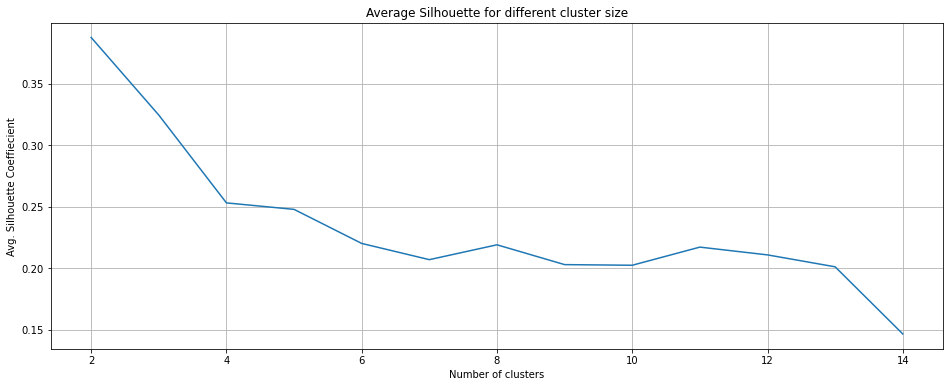

In [66]:
plt.figure(figsize = (16, 6))
plt.xlabel('Number of clusters')
plt.ylabel('Avg. Silhouette Coeffiecient')
plt.title('Average Silhouette for different cluster size')
plt.plot(no_of_clusters, avg_silh)
plt.grid()
plt.show()

<AxesSubplot:>

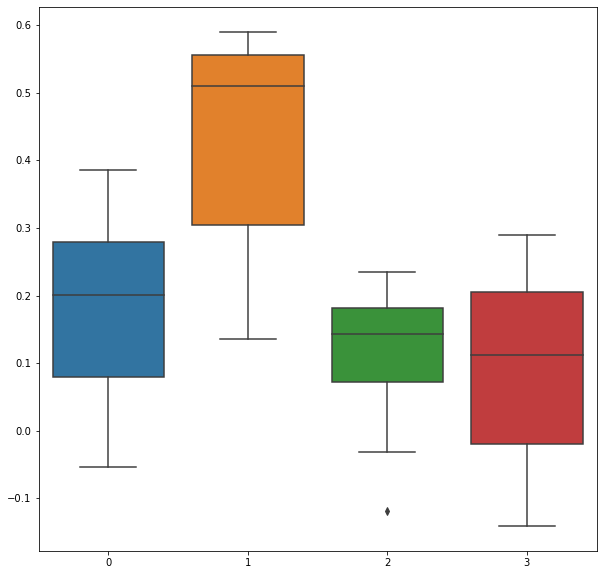

In [71]:
n_clusters = 4
clusterer = KMeans(n_clusters=n_clusters, random_state=2)
cluster_labels = clusterer.fit_predict(new_raw_data)
sample_silhouette_values = silhouette_samples(new_raw_data, cluster_labels)
plt.figure(figsize = (10,10))
sns.boxplot(x = cluster_labels, y = sample_silhouette_values)